In [55]:
import requests
import numpy as np
import matplotlib.pylab as plt
import json, os
from glob import glob
import pandas as pd

# data AROME from opendatasoft

données de prévision météo du modèle AROME de météo france, distribuées par OpenDataFrance


In [56]:
def read_json(path):
    with open(path, 'r') as f:
        data = json.load(f)

    records = [d['fields'] for d in data['records']]

    df = pd.DataFrame.from_records(records, index='forecast')
    df.index = pd.to_datetime(df.index)
    return df

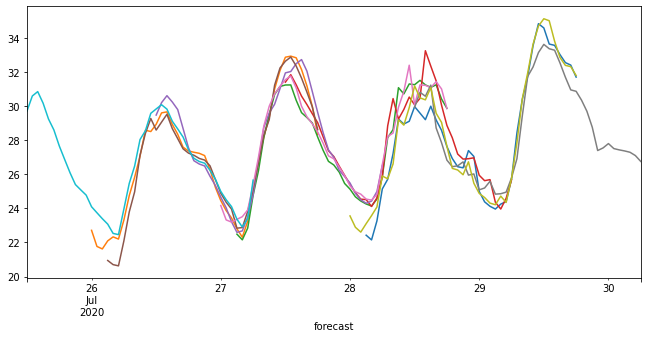

In [57]:
filepaths = glob('data/*.json')
data = [read_json(path) for path in filepaths]

plt.figure(figsize=(11, 5))
for df in data:
    df['2_metre_temperature'].plot();

In [58]:
data[0].columns

Index(['surface_net_thermal_radiation', 'downward_short_wave_radiation_flux',
       '2_metre_temperature', 'dist', 'minimum_temperature_at_2_metres',
       'surface_net_solar_radiation', 'timestamp', 'surface_latent_heat_flux',
       'total_water_precipitation', 'relative_humidity',
       'surface_sensible_heat_flux', 'position', 'wind_speed',
       'maximum_temperature_at_2_metres'],
      dtype='object')

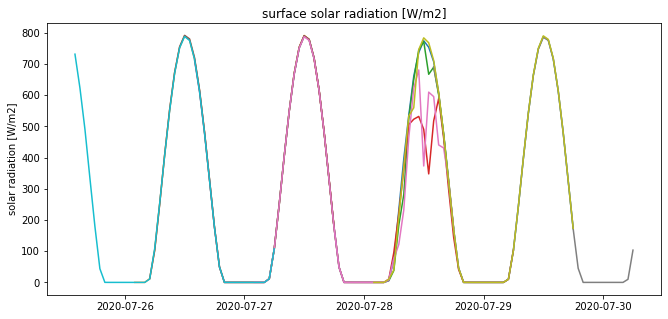

In [59]:
plt.figure(figsize=(11, 5))
for df in data:
    sum_irad = df['surface_net_solar_radiation'].to_numpy()
    t_sec = df.index.astype(int)*1e-9
    dt_sec = np.diff( t_sec )
    flux = np.diff( sum_irad )/dt_sec
    plt.plot(df.index[:-1], flux, label='surf. solar radiation')
    
plt.ylabel('solar radiation [W/m2]');
plt.title('surface solar radiation [W/m2]');

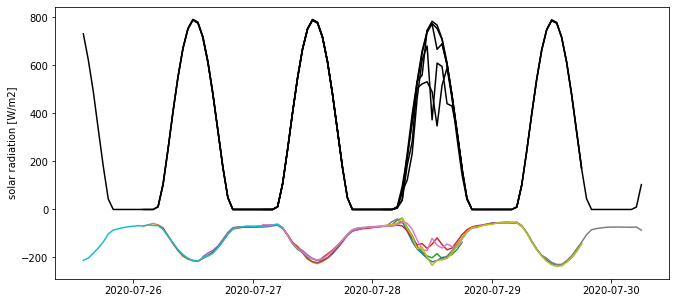

In [60]:
plt.figure(figsize=(11, 5))
for df in data:
    sum_irad = df['surface_net_solar_radiation'].to_numpy()
    t_sec = df.index.astype(int)*1e-9
    dt_sec = np.diff( t_sec )
    flux = np.diff( sum_irad )/dt_sec
    plt.plot(df.index[:-1], flux, label='surf. solar radiation', color='black')
    
    sum_irad = df['surface_net_thermal_radiation'].to_numpy()
    t_sec = df.index.astype(int)*1e-9
    dt_sec = np.diff( t_sec )
    flux = np.diff( sum_irad )/dt_sec
    plt.plot(df.index[:-1], flux, label='surface_net_thermal_radiation')
    
plt.ylabel('solar radiation [W/m2]');